In [37]:
import numpy as np
import scipy.stats as sps
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import subprocess

In [86]:
def benchmark(edge_size):
    output = subprocess.run(r'rm -rf build && mkdir -p build && cd build && '
                            f'cmake -E env CXXFLAGS="-O3 -DEDGE_SIZE={edge_size}" cmake .. && '
                            r'make && ./rule30_21', shell=True, capture_output=True)
    return float(output.stdout.decode().split()[-1])

In [53]:
samples = pd.DataFrame()
def add_samples(sizes, samples):
    for size in sizes:
        print(size)
        samples = samples.append({
            'edge_size': size,
            'time': benchmark(int(size)),
        }, ignore_index=True)
    return samples

In [87]:
samples = add_samples(np.linspace(0, 100000, num=21)[1:], samples)
samples

5000.0
10000.0
15000.0
20000.0
25000.0
30000.0
35000.0
40000.0
45000.0
50000.0
55000.0
60000.0
65000.0
70000.0
75000.0
80000.0
85000.0
90000.0
95000.0
100000.0


,edge_size,time,m_time
0,5000.0,0.025435,1017.384000
1,10000.0,0.082574,825.738000
2,15000.0,0.172022,764.542222
3,20000.0,0.307342,768.355000
4,25000.0,0.460354,736.566400
...,...,...,...
95,80000.0,0.928326,NaN
96,85000.0,1.045470,NaN
97,90000.0,1.163680,NaN
98,95000.0,1.300860,NaN


In [88]:
samples['m_time'] = samples.time * (1e6 / samples.edge_size) ** 2
samples

,edge_size,time,m_time
0,5000.0,0.025435,1017.384000
1,10000.0,0.082574,825.738000
2,15000.0,0.172022,764.542222
3,20000.0,0.307342,768.355000
4,25000.0,0.460354,736.566400
...,...,...,...
95,80000.0,0.928326,145.050938
96,85000.0,1.045470,144.701730
97,90000.0,1.163680,143.664198
98,95000.0,1.300860,144.139612


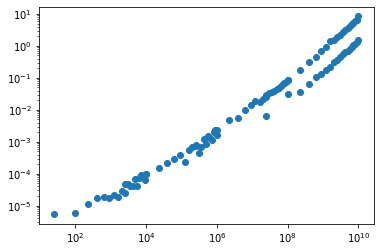

In [89]:
ax = plt.axis()
plt.yscale('log')
plt.xscale('log')
plt.scatter(samples.edge_size ** 2, samples.time)

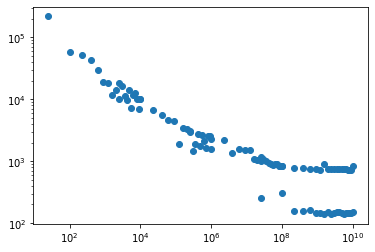

In [90]:
ax = plt.axis()
plt.yscale('log')
plt.xscale('log')
plt.scatter(samples.edge_size ** 2, samples.m_time)

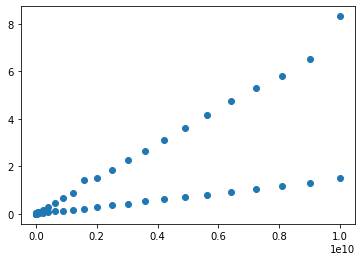

In [91]:
ax = plt.axis()
# plt.yscale('log')
# plt.xscale('log')
plt.scatter(samples.edge_size ** 2, samples.time)